In [62]:
from toygrad import Value
from draw_graph import *
import random


EXAMPLE 1: Cost of Driving

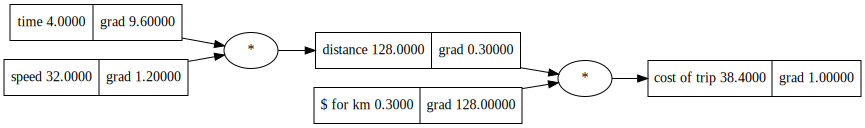

In [63]:

#Let's define our variables

speed = Value(32, _label="speed") #speed in km/h
time = Value(4, _label="time") #time of driving

distance = speed * time #Total distance 
distance._label = "distance"

fuel_cost_per_km = Value(0.3, _label="$ for km") #How much we spend on fuel 


total_cost = distance * fuel_cost_per_km
total_cost._label = "cost of trip"



#Let's figure out which part influence total cost computing derivatives
total_cost.backward()

#Let's draw the computational graph with result

draw_dot(total_cost)

EXAMPLE 2: Computing derivative of complicated function

$\text{F(x,y)} = (x - 0.2)^3 + \frac{1}{e^{2y} } + xy$


gradient of x wrt to F is 10.42
gradient of y wrt ti F is 1.506806072116787


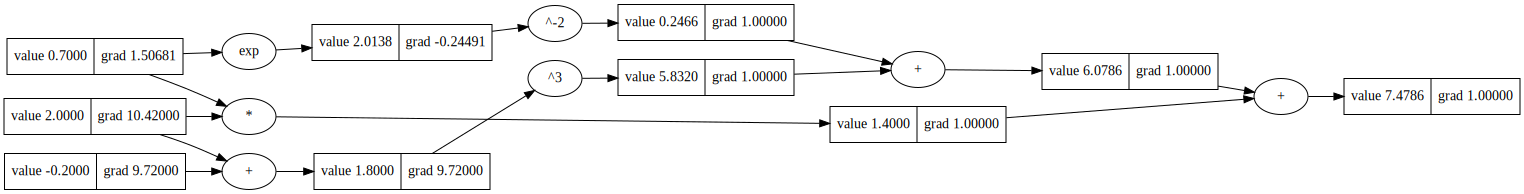

In [64]:

x = Value(2)
y = Value(0.7)


#Compute your function step by  step
step1 = (x - 0.2) ** 3
step2 = y.exp() ** -2
step3 = step1 + step2 + x*y


#run backpropogation on last step
step3.backward()

print(f"gradient of x wrt to F is {x.grad}")  #dF/dx =  10.42
print(f"gradient of y wrt ti F is {y.grad}")  #dF/dy = 1.506


#draw computation graph

draw_dot(step3)

### Training a Neural Net for Binary Classification

Let's set up a simple Neural Network for this problem



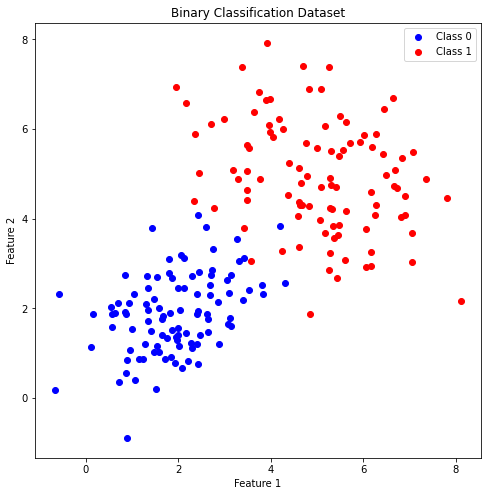

In [65]:
import numpy as np
import matplotlib.pyplot as plt
from nn import MLP




# Number of samples per class
n_samples = 100

# Class 0
mean0 = [2, 2]
cov0 = [[1, 0.5], [0.5, 1]]
x0, y0 = np.random.multivariate_normal(mean0, cov0, n_samples).T

# Class 1
mean1 = [5, 5]
cov1 = [[1.5, -0.5], [-0.5, 1.5]]
x1, y1 = np.random.multivariate_normal(mean1, cov1, n_samples).T 

# Visualizing the dataset
plt.figure(figsize=(8, 8))
plt.scatter(x0, y0, color='blue', label='Class 0')
plt.scatter(x1, y1, color='red', label='Class 1')
plt.legend(loc="upper right")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Binary Classification Dataset')
plt.show()

# Constructing the dataset
#Normalizing 
X = np.vstack((np.column_stack((x0, y0)), np.column_stack((x1, y1)))) / 8 
y = np.hstack((np.zeros(n_samples), np.ones(n_samples)))

In [66]:
random.seed(5)


layer_sizes = [3,  1]
activations = ["relu", "sigmoid"]

model = MLP(n_inputs=2, layers_sizes=layer_sizes, activations=activations)


#TRAINING LOOP

alpha = 0.3
epochs = 150

for ep in range(0, epochs + 1):
    
    predictions = [model(X[i]) for i in range(len(X))]
    
    MSE = sum([(predictions[i] - y[i]) ** 2 for i in range(len(X))]) / len(X)
    
    MSE.backward()
    
    parameters = model.parameters()
    
    if ep % 10 == 0:
        
        print(f"Epoch {ep}; MSE = {MSE.val}")
    
    #Updating params
    for p in parameters:
        
        p.val -= alpha * p.grad
        
        p.grad = 0
        
        
    
    
    
    

Epoch 0; MSE = 0.23011002100246095
Epoch 10; MSE = 0.1672390788615698
Epoch 20; MSE = 0.1504335100533481
Epoch 30; MSE = 0.1343560832281877
Epoch 40; MSE = 0.11952516777368213
Epoch 50; MSE = 0.10642110691874383
Epoch 60; MSE = 0.09515234519786145
Epoch 70; MSE = 0.08565077201473281
Epoch 80; MSE = 0.077701401785034
Epoch 90; MSE = 0.07105277963169995
Epoch 100; MSE = 0.06547040648179696
Epoch 110; MSE = 0.06076094909951984
Epoch 120; MSE = 0.056763196313398954
Epoch 130; MSE = 0.053344313364026626
Epoch 140; MSE = 0.05040044962159417
Epoch 150; MSE = 0.04784300768398315


In [57]:
treshold_preds = np.array([int(pred.val > 0.5) for pred in predictions])

In [60]:
from sklearn.metrics import accuracy_score

print("Accuracy on train data = ", accuracy_score(treshold_preds, y))

Accuracy on train data =  0.965


As you can see, we can even build a Neural Networks on top of this auto-grad engine. 
Although it works quite inefficient and slow, it is still a valueable example for those who entering Machine Learning